# Binary classification with Genetic Programming

Classification in GP works in exactly the same way as regression in how the evolution takes place. The only difference here is that the output of the program is transformed through a sigmoid function in order to transform the numeric output into probabilities of each class. In essence this means that a negative output of a function means that the program is predicting one class, and a positive output predicts the other.

Here we consider the [Breast Cancer Wisconsin (Diagnostic) dataset](https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic), a well-known dataset included in the `scikit-learn` library. The primary purpose of this dataset is binary classification. It is used to distinguish between benign and malignant breast tumors based on various features extracted from biopsied breast cells.

We will leverage **Genetic Programming** (GP) to address this problem. Let us import some useful modules. If you are using `conda`, you can install `graphviz` with the following commands:

```
conda install graphviz
conda install python-graphviz
conda install pydot
```

In [79]:
import gplearn.genetic as gp
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
import graphviz

Now explore the dataset and perform some preprocessing, if necessary.

In [80]:
cancer = load_breast_cancer(as_frame=True)
df = cancer.frame
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [81]:
df.shape

(569, 31)

Check if there is any missing value.

In [82]:
df.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

In [83]:
df.isna().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

Check the presence of duplicates

In [84]:
df.duplicated().sum()

0

In [85]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [86]:
y = df['target']
X = df.drop(['target'], axis=1)

#X = (X-X.mean())/X.std()

Caculate the correlation matrix

In [87]:
correlation_matrix = X.corr()

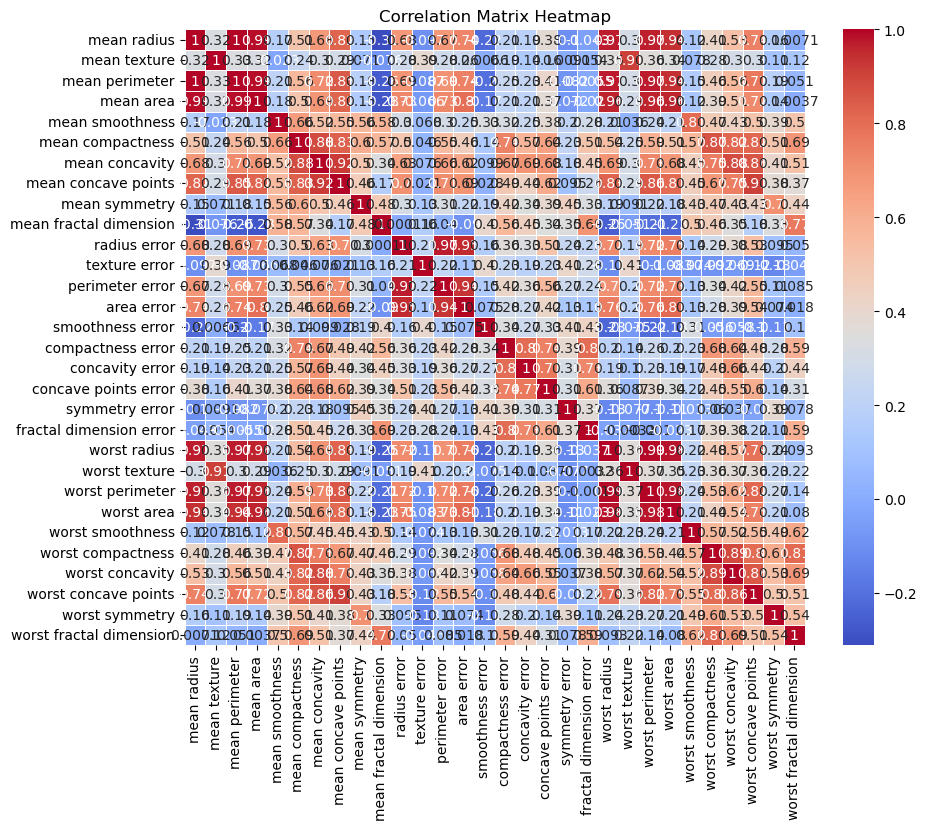

In [88]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()

Some variables are highly correlated, we can drop some

In [89]:
col_to_drop = ['mean perimeter', 'mean area', 'worst radius', 'worst perimeter', 'radius error', 'perimeter error']
X = X.drop(col_to_drop, axis=1)

In [90]:
var_names = cancer.feature_names
feature_names = [name for name in var_names if name not in col_to_drop]

Split your dataset into train and validation/test set

In [91]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=0)


Define a metric for validation

In [92]:
def binary_cross_entropy(y_true, y_pred):

    epsilon = 1e-15  # Small constant to avoid division by zero
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)  # Clip predicted values to prevent log(0)
    loss = - (y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

    return np.mean(loss)

Run the actual GP algorithm.

In [93]:
fset=('add', 'sub', 'mul', 'div')
loss_history = []
max_gen = 30
sc = gp.SymbolicClassifier(population_size=1000,
                            tournament_size=20,
                            function_set=fset,
                            parsimony_coefficient=0.02,
                            p_crossover=0.9,
                            p_subtree_mutation=0.01, # Probability of subtree mutation
                            p_hoist_mutation=0.01, # Small probability of hoist mutation
                            p_point_mutation=0.01, # Small probability of point mutation
                            generations=1,
                            random_state=1,
                            feature_names=feature_names,
                            warm_start=True)
for i in range(0, max_gen+1):
    sc.set_params(generations=i+1)
    sc.fit(X_train, y_train)
    y_score = sc.predict_proba(X_val)[:,1]
    loss_history.append(binary_cross_entropy(y_val, y_score))

Plot results

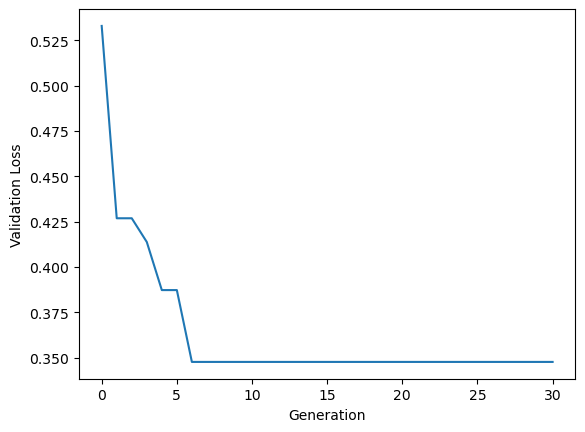

In [94]:
plt.plot(loss_history)
plt.ylabel('Validation Loss')
plt.xlabel('Generation')
plt.show()

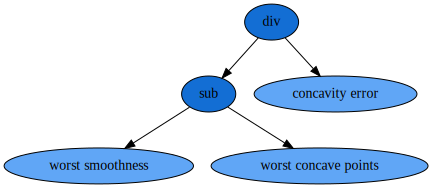

In [95]:
dot_data=sc._program.export_graphviz()
graphviz.Source(dot_data)